In [5]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [8]:
from langchain.chat_models import init_chat_model
# https://python.langchain.com/docs/integrations/tools/tavily_search/


In [9]:
%pip install -qU langchain-tavily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from langchain_tavily import TavilySearch

In [11]:
tavily_tool = TavilySearch(
    max_results=3,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [12]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [13]:
tool_node = ToolNode([tavily_tool])
gemini_llm_with_tools = gemini_llm.bind_tools([tavily_tool])

In [14]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = gemini_llm_with_tools.invoke(state['messages'])
    return state

In [15]:
tools_graph_builder = StateGraph(MessagesState)
tools_graph_builder.add_node("llm", call_model)
tools_graph_builder.add_node("tools", tool_node)
tools_graph_builder.add_edge("llm", "tools")
tools_graph_builder.set_entry_point("llm")
tools_graph_builder.set_finish_point("tools")
tools_graph = tools_graph_builder.compile()

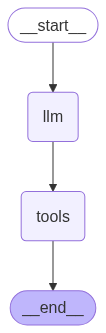

In [16]:
from IPython.display import Image, display
display(Image(tools_graph.get_graph().draw_mermaid_png()))

In [17]:
results = tools_graph.invoke({"messages": "What are latest updates from Google Gemini?"})

In [18]:
results

{'messages': [HumanMessage(content='What are latest updates from Google Gemini?', additional_kwargs={}, response_metadata={}, id='0530d1e6-a646-4bef-ac63-f3d664fdfdff'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search', 'arguments': '{"query": "latest updates from Google Gemini", "topic": "general"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 770, 'candidates_token_count': 12, 'total_token_count': 782, 'prompt_tokens_details': [{'modality': 1, 'token_count': 770}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 12}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.07308511435985565, 'model_name': 'gemini-2.0-flash-lite-001'}, id='run--484ca330-ee1d-4646-beb9-b3c65f99a421-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'latest updates from Google Gemini', 'topic': 'general'}, 'id'

In [19]:
import json
parsed_result = json.loads(results['messages'][-1].content)
parsed_result

{'query': 'latest updates from Google Gemini',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': "\u200eGemini Apps' release updates & improvements",
   'url': 'https://gemini.google.com/updates',
   'content': "Explore the latest updates from Gemini Apps - including improvements in generative AI capabilities, expanded access, and more. ... Gemini Advanced gives you access to our most capable AI model, 1.0 Ultra. If you want to be one of the first to access Google's latest AI advancements as they become available, this is for you. With our 1.0 Ultra",
   'score': 0.8409005,
   'raw_content': None},
  {'title': "Gemini just saw a huge upgrade to its AI model - Tom's Guide",
   'url': 'https://www.tomsguide.com/ai/gemini-just-saw-a-huge-upgrade-to-its-ai-model-heres-everything-new-you-can-do',
   'content': "(Image credit: Google) The main update for 2.5 Pro from Google came early.Announced in the first week of May, this update improved Gemini 2.5 Pro's

In [20]:
for result in parsed_result['results']:
    print(result['content'])

Explore the latest updates from Gemini Apps - including improvements in generative AI capabilities, expanded access, and more. ... Gemini Advanced gives you access to our most capable AI model, 1.0 Ultra. If you want to be one of the first to access Google's latest AI advancements as they become available, this is for you. With our 1.0 Ultra
(Image credit: Google) The main update for 2.5 Pro from Google came early.Announced in the first week of May, this update improved Gemini 2.5 Pro's ability to build interactive web apps.
Produce stunning visuals and videos with Imagen 4 and Veo 3. The Gemini app makes it easy to go from an idea to breathtaking images and videos. Whether you're designing a sleek professional presentation, whipping up social media graphics or crafting event invitations, Imagen 4 delivers visuals that pop with lifelike detail and better text and typography outputs.


In [21]:
#https://python.langchain.com/docs/integrations/tools/openweathermap/
%pip install --upgrade --quiet pyowm
%pip install langchain-community

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
load_dotenv()

True

In [34]:
from langchain_community.utilities import OpenWeatherMapAPIWrapper


In [35]:
weather = OpenWeatherMapAPIWrapper()
tools = [weather.run]

In [36]:
gemini_llm = init_chat_model(model="gemini-2.0-flash-lite-001", model_provider="google_vertexai")

In [37]:
gemini_llm_with_tools = gemini_llm.bind_tools(tools)

In [38]:
tool_node = ToolNode(tools)

In [39]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = gemini_llm_with_tools.invoke(state['messages'])
    return state

In [40]:
tools_graph_builder = StateGraph(MessagesState)
tools_graph_builder.add_node("llm", call_model)
tools_graph_builder.add_node("tools", tool_node)
tools_graph_builder.add_edge("llm", "tools")
tools_graph_builder.set_entry_point("llm")
tools_graph_builder.set_finish_point("tools")
tools_graph = tools_graph_builder.compile()

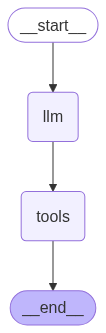

In [41]:
from IPython.display import Image, display
display(Image(tools_graph.get_graph().draw_mermaid_png()))

In [51]:
results = tools_graph.invoke({"messages": "What is Weather like in Hyderabad"})


In [52]:
print(results['messages'][-1].content)

In Hyderabad, the current weather is as follows:
Detailed status: overcast clouds
Wind speed: 7.96 m/s, direction: 271°
Humidity: 48%
Temperature: 
  - Current: 30.75°C
  - High: 30.75°C
  - Low: 30.75°C
  - Feels like: 31.85°C
Rain: {}
Heat index: None
Cloud cover: 95%
